In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data_jp_population = np.loadtxt('../data/jp_population.csv', delimiter=',')


In [3]:
year = data_jp_population[:, 0]
jp_pop = data_jp_population[:,1]/1000

print("Year: {0}".format(year[:5]))
print('Population: {0}'.format(jp_pop[:5]))


Year: [1910. 1915. 1920. 1925. 1930.]
Population: [49.184 52.752 55.963 59.737 64.45 ]


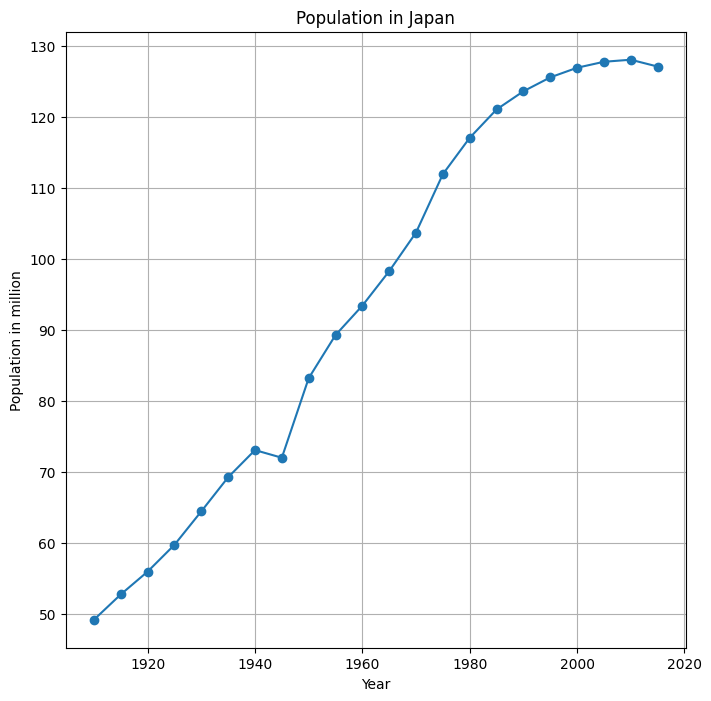

In [4]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
ax.plot(year, jp_pop,marker='o')

ax.set_title('Population in Japan')
ax.set_xlabel('Year')
ax.set_ylabel('Population in million')

ax.grid()
plt.show()


In [5]:
jp_pop[21] - jp_pop[20]

-0.9619999999999891

In [6]:
diff_jp_pop = np.diff(jp_pop, n=1)
print('Population: {0}'.format(diff_jp_pop[-3:]))


Population: [ 0.842  0.289 -0.962]


In [7]:
diff_year = np.diff(year, n=1)
print('Year: {0}'.format(diff_year[:5]))


Year: [5. 5. 5. 5. 5.]


In [8]:
ave_diff_rate_jp_pop = diff_jp_pop / diff_year
print('Population rate: {0}'.format(ave_diff_rate_jp_pop[:5]))


Population rate: [0.7136 0.6422 0.7548 0.9426 0.9608]


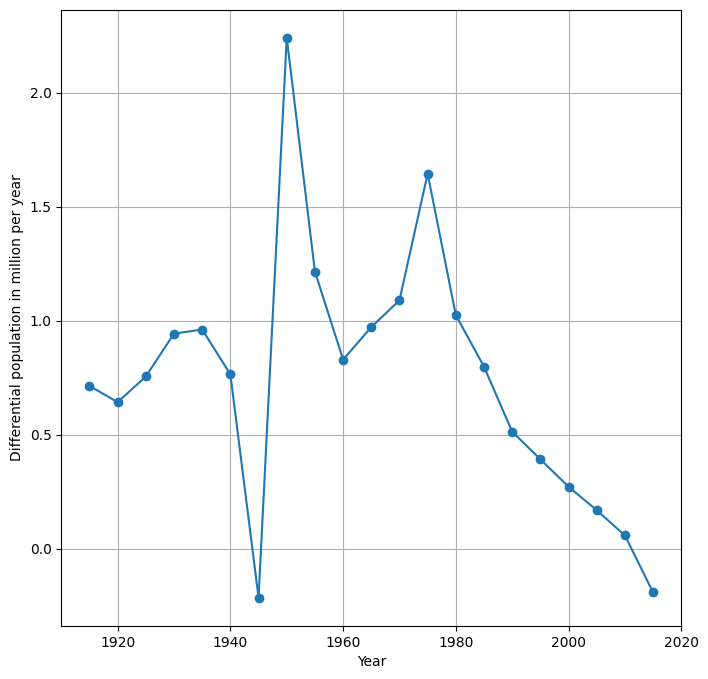

In [9]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(year[1:], ave_diff_rate_jp_pop, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Differential population in million per year')
ax.grid()
plt.show()

In [10]:
from sympy import symbols, init_printing
init_printing(use_latex='mathjax')

x = symbols('x')
f = x**2
(f.subs(x, 2) - f.subs(x, 1) / (2-1))

3

In [11]:
from sympy import diff, sin, cos, tan, symbols
x = symbols('x')
diff(tan(x), x, 1)

tan(x)**2 + 1

In [11]:
#平均変化率を出力する関数、fはシンボル、a,bは数値またはシンボル
def ava_rate(f,a,b):
    return(f.subs(x,b) - f.subs(x,a))/(b-a)

In [12]:
ava_rate(f, 1,2)


3

In [13]:
ava_rate(f,1,2) *(x - 2) + f.subs(x,2)

3⋅x - 2

In [14]:
def line_bw_2pts(f,a,b):
    return ava_rate(f,a,b) * (x - a) + f.subs(x, a)

In [15]:
line_bw_2pts(f,1,2)

3⋅x - 2

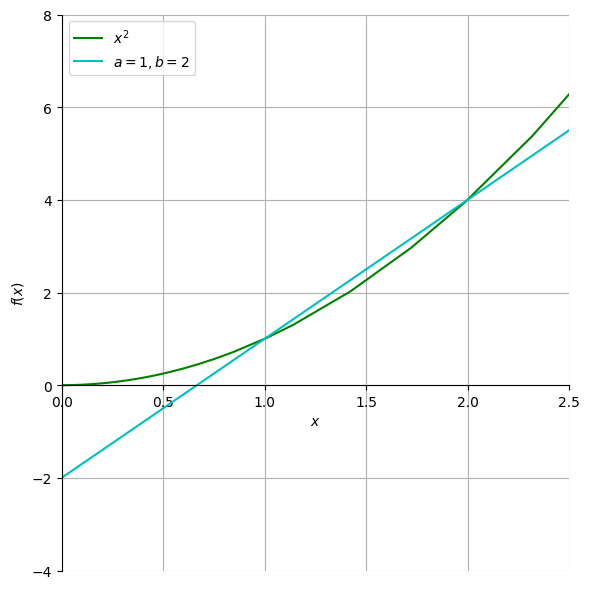

In [16]:
from sympy.plotting import plot
from matplotlib import rcdefaults
import matplotlib.pyplot as plt

p = plot(f,line_bw_2pts(f,1,2),
         show=False, legend=True)

p.xlim = [0, 2.5]
p.ylim = [-4, 8]

p[0].line_color = 'g'
p[1].line_color = 'c'

p[0].label = '$x^2$'
p[1].label = '$a=1, b=2$'

rcdefaults()
plt.rcParams['figure.figsize'] = 6,6
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['axes.grid'] = True

p.show()


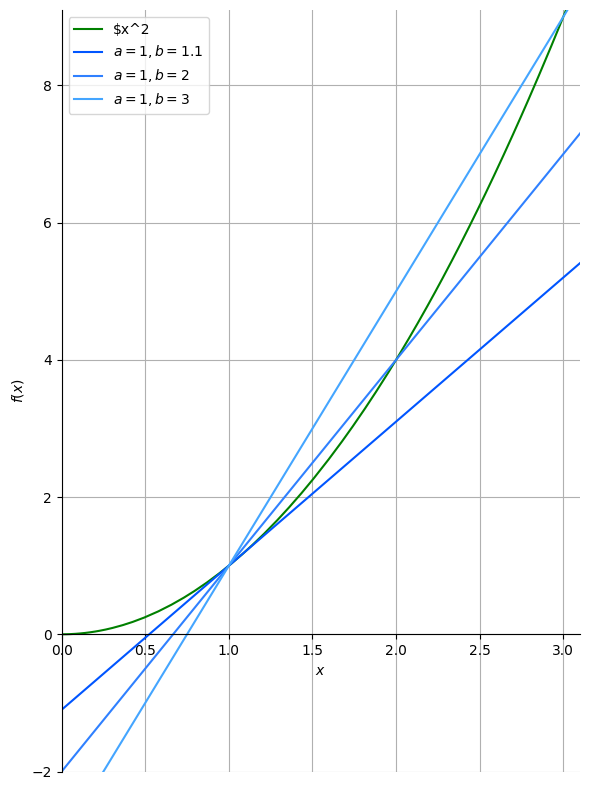

In [17]:
p = plot((f, (x, 0, 4)),
          (line_bw_2pts(f, 1, 1.1), (x,0,4)),
          (line_bw_2pts(f,1,2), (x,0,4)),
          (line_bw_2pts(f,1,3), (x,0,4)),
          show = False, legend = True
          )
p.xlim = [0,3.1]
p.ylim = [-2, 9.1]

p[0].line_color = 'g'
p[1].line_color = '#0055FF'
p[2].line_color = '#2F80FF'
p[3].line_color = '#44A5FF'

p[0].label = '$x^2'
p[1].label = '$a=1, b=1.1$'
p[2].label = '$a=1, b=2$'
p[3].label = '$a=1, b=3$'

rcdefaults()
plt.rcParams['figure.figsize'] = 6,8
plt.rcParams['legend.loc'] = 'upper left'
plt.rcParams['axes.grid'] = True

p.show()

In [18]:
from sympy import limit
h = symbols('h')
limit((f.subs(x, x+h) -f)/ h, h,0)

2⋅x

In [19]:
from sympy import diff

diff(f,x)

2⋅x

In [20]:
#高階微分
diff(f, x, 2)

2

In [21]:
from sympy import Function
x = symbols('x', real=True)

f = Function('f')
g = Function('g')

diff(f(x) * g(x))


     d               d       
f(x)⋅──(g(x)) + g(x)⋅──(f(x))
     dx              dx      

In [25]:
(diff(f(x)/ g(x)))

       d          d       
  f(x)⋅──(g(x))   ──(f(x))
       dx         dx      
- ───────────── + ────────
       2            g(x)  
      g (x)               

In [28]:
from sympy import latex

rcdefaults()

def diff_and_mk_graph(f, x_range=[-4, 4], y_range=[0,0]):
    p = plot(f, diff(f), (x,x_range[0], x_range[1]),
             show=False, legend=True)
    if(y_range != [0,0]):
        p.ylim = [y_range[0], y_range[1]]
    
    p[0].line_color = 'b'
    p[1].line_color = 'r'

    p[0].label = f'Original: $ {latex(f)} $'
    p[1].label = f'Differential: $ {latex(diff(f))} $' 
    
    p.show()

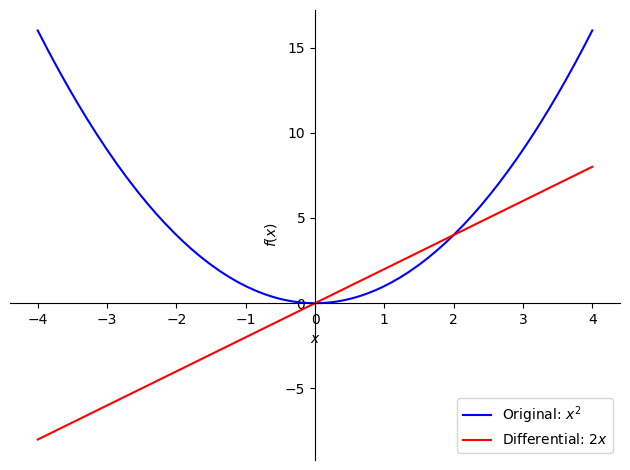

In [29]:
diff_and_mk_graph(x**2)

In [30]:
n = symbols('n')
diff(x**n, x)

   n
n⋅x 
────
 x  

In [31]:
from sympy import powsimp
powsimp(diff(x**n, x))

   n - 1
n⋅x     

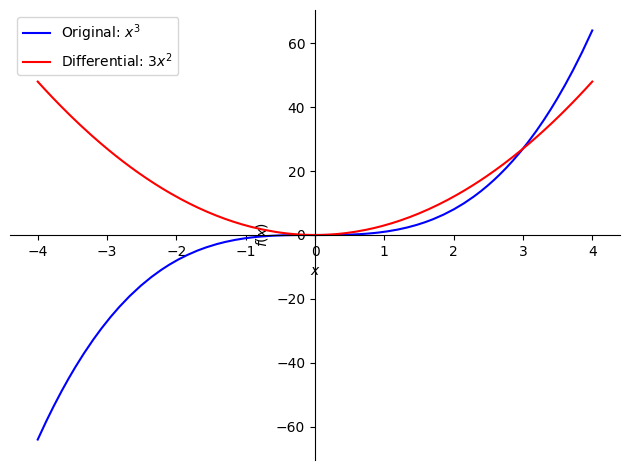

In [32]:
diff_and_mk_graph(x**3)

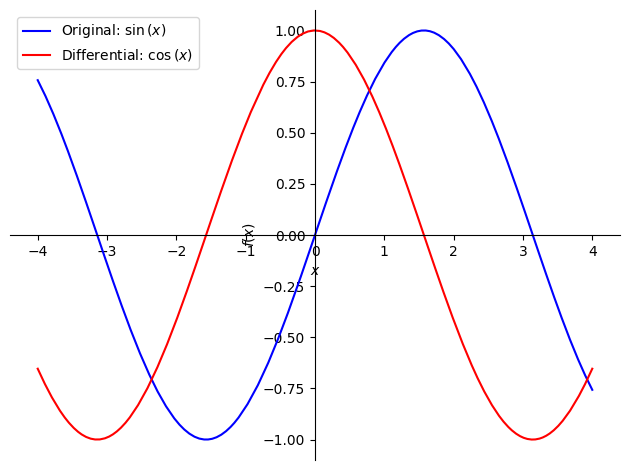

In [34]:
from sympy import sin,cos,tan,pi
diff_and_mk_graph(sin(x))

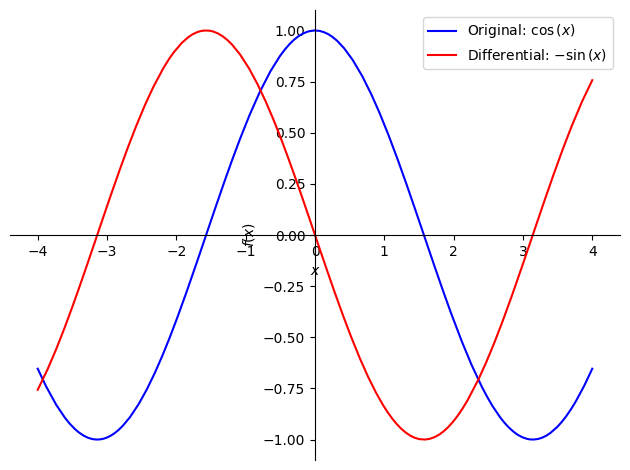

In [35]:
diff_and_mk_graph(cos(x))

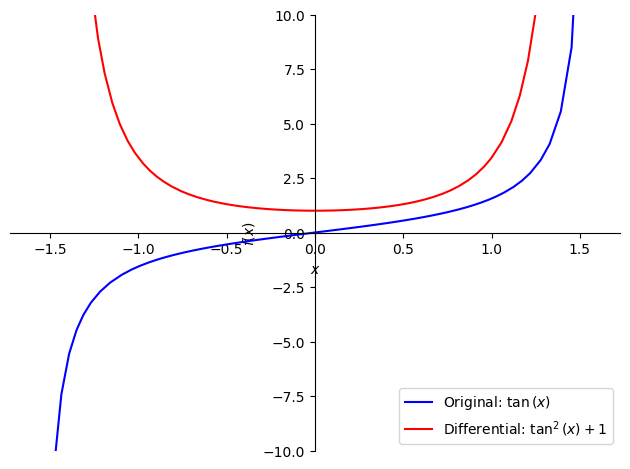

In [36]:
diff_and_mk_graph(tan(x), [-pi/2, pi/2], [-10, 10])

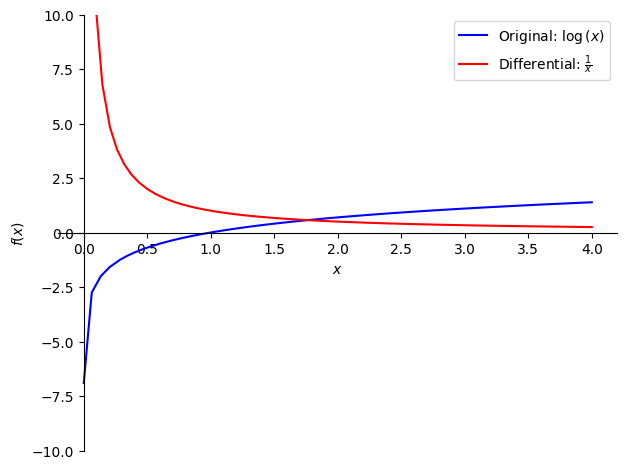

In [37]:
from sympy import log

#対数関数の微分
diff_and_mk_graph(log(x), [0.001, 4.000], [-10, 10])

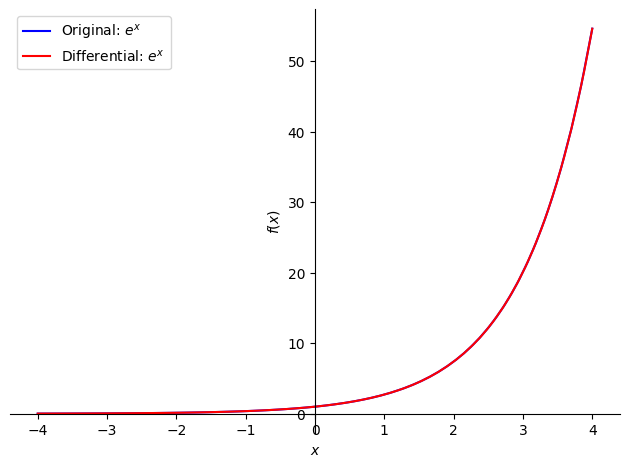

In [38]:
from sympy import exp
#指数関数の微分
diff_and_mk_graph(exp(x))

- $e$を底とする指数関数は微分しても同じ関数になる

## シグモイド関数
  - 確率計算で使われる。
    - 機械学習の分類問題やニューラルネットワークの計算

$$ f(x) = \frac{1}{1 + e^{-1}}$$

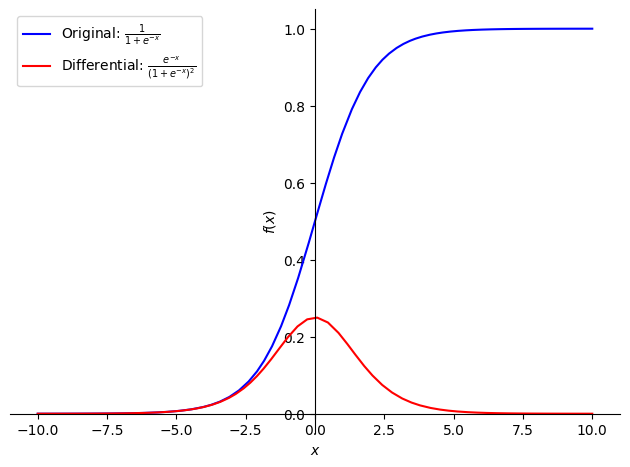

In [39]:
#シグモイド関数
diff_and_mk_graph(1 / (1 + exp(-x)), [-10, 10])

- 変化量と変化率は微分を理解するための基本。
- 微分係数とは供養区処的な関数の傾き。
  - 微分するとは関数の傾きを示す導関数を求めること。

